<a href="https://colab.research.google.com/github/Patternic10/CSCI-4170-Project-in-AI-ML/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1

#Define the Logistic Regression Model
The logistic regression model for binary classification can be expressed as:
\[
P(Y=1|X) = $\sigma(\mathbf{w}^T \mathbf{x} + b)$
\]
where $\sigma(z)$ is the sigmoid function:
\[
$\sigma(z)$ = $\frac{1}{1 + e^{-z}}$
\]
Here, $\mathbf{w}$ is the weight vector, $\mathbf{x}$ is the feature vector, and $b$ is the bias term. For brevity, let's write $\mathbf{w}^T \mathbf{x} + b$ as $z$.

#Likelihood Function
Given a dataset with $N$ observations where each observation $(x_i, y_i)$ has $y_i$ being either 0 or 1, the likelihood of the parameters given the data is:
L($\mathbf{w}$, $b$) = $\prod_{i=1}^N P(y_i | x_i)$

For each observation:
    If $y_i = 1$, then $P(y_i = 1 | x_i) = \sigma(z_i)$
     If $y_i = 0$, then $P(y_i = 0 | x_i) = 1 - \sigma(z_i)$

Thus, the likelihood can be written as:
$$L(\mathbf{w}, b) = \prod_{i=1}^N \sigma(z_i)^{y_i} (1 - \sigma(z_i))^{1 - y_i}$$

#Log-Likelihood
To simplify calculations and optimization, we take the logarithm of the likelihood:

$$\log L(\mathbf{w}, b) = \sum_{i=1}^N \left[ y_i \log(\sigma(z_i)) + (1 - y_i) \log(1 - \sigma(z_i)) \right]$$


#Objective Function for MLE
For logistic regression, we want to maximize this log-likelihood. However, since many optimization algorithms minimize functions, we convert this maximization into a minimization problem by negating the log-likelihood:

$$\text{Objective Function} = -\log L(\mathbf{w}, b) = -\sum_{i=1}^N \left[ y_i \log(\sigma(z_i)) + (1 - y_i) \log(1 - \sigma(z_i)) \right]$$

### Final Objective Function:
$$J(\mathbf{w}, b) = -\sum_{i=1}^N \left[ y_i \log\left(\frac{1}{1 + e^{-z_i}}\right) + (1 - y_i) \log\left(1 - \frac{1}{1 + e^{-z_i}}\right) \right]$$

This function is minimized to find the optimal parameters $\mathbf{w}$ and $b$.

### Maximum A Posteriori (MAP)

MAP estimation, in contrast, aims to maximize the posterior probability of the parameters given the data:

$$ \theta_{MAP} = \arg \max_{\theta} P(\theta | \text{data}) $$

Using Bayes' theorem:

$$ P(\theta | \text{data}) \propto P(\text{data} | \theta) \cdot P(\theta) $$

Here, $P(\theta)$ is the prior distribution over the parameters. A common choice for logistic regression is a Gaussian prior:

$$ P(\theta) \propto \exp\left(-\frac{\lambda}{2} \theta^T \theta\right) $$

Thus, the objective function for MAP becomes:

$$ J_{MAP} = J_{MLE} + \frac{\lambda}{2} \theta^T \theta $$

## Differences between MAP and MLE

1. **Prior Knowledge**:
   - **MLE** does not account for prior knowledge about parameters.
   - **MAP** includes a prior distribution, which can guide parameter estimation.

2. **Regularization**:
   - **MLE** requires manual addition of regularization like L1 or L2.
   - **MAP** naturally incorporates regularization through the choice of prior (e.g., Gaussian prior leads to L2 regularization).

3. **Handling Small Datasets**:
   - **MAP** can be more robust with limited data by leveraging prior information.

4. **Practical Implications**:
   - **MAP** offers a Bayesian perspective, potentially improving model generalization.

   [1] D. Cousineau and S. Helie, “Improving maximum likelihood estimation using prior probabilities: A tutorial on maximum a posteriori estimation and an examination of the weibull distribution,” Tutor. Quant. Methods Psychol., vol. 9, no. 2, pp. 61–71, 2013.

# Logistic Regression for Heart Disease Prediction

## Problem Definition
The goal is to predict whether a patient is likely to have heart disease based on features such as age, cholesterol level, blood pressure, and other medical indicators. This is a binary classification problem where the target variable has two possible outcomes:
- **1**: The patient has heart disease.
- **0**: The patient does not have heart disease.

## Why Logistic Regression is the Best Choice
1. **Interpretability**: Logistic Regression provides clear insights into the relationship between features and the probability of heart disease. The coefficients of the model can indicate the strength and direction of the association between each feature and the target variable.
   
2. **Linear Decision Boundary**: Logistic Regression is effective when the relationship between the independent variables (features) and the log-odds of the dependent variable (target) is approximately linear.

3. **Probabilistic Output**: It predicts probabilities rather than just class labels, which is crucial in medical applications where understanding the likelihood of an event (heart disease) is often as important as the classification itself.

4. **Simplicity and Efficiency**: Logistic Regression is computationally efficient and works well for datasets with a moderate number of features, making it suitable for heart disease prediction with clinical data.

## Comparison to Support Vector Machine (SVM)
| **Aspect**                 | **Logistic Regression**                                | **SVM**                                           |
|----------------------------|-------------------------------------------------------|--------------------------------------------------|
| **Interpretability**       | High - Coefficients are directly interpretable.       | Low - Model parameters (support vectors) are less intuitive. |
| **Output Type**            | Probabilistic (predicts probabilities).               | Deterministic (produces decision boundary; probabilities need additional processing). |
| **Computational Efficiency** | Faster, especially for large datasets.               | Slower, particularly for large datasets with complex kernels. |
| **Regularization**         | Built-in with options for L1 and L2 norms.            | Requires careful tuning of the kernel and regularization parameters. |
| **Non-linear Relationships**| Cannot handle non-linear relationships directly.     | Can handle non-linear relationships with kernels (e.g., RBF). |

## Justification
Logistic Regression is the better choice for heart disease prediction because:
- The medical domain values interpretability, which Logistic Regression provides.
- The dataset likely has a relatively small number of features, making Logistic Regression effective.
- Probabilistic predictions are essential for clinical decision-making, where we need to assess the likelihood of heart disease rather than a binary "yes" or "no."

For non-linear relationships or datasets with complex feature interactions, SVM might be a better choice. However, Logistic Regression remains ideal for this problem due to its simplicity, transparency, and alignment with the needs of the medical domain.


## Dataset Correspondence

- **Features (X):** Age, education, blood pressure, glucose, etc., forming feature vectors for each patient.
- **Label (Y):** Binary (0 or 1) for absence or presence of heart disease.

### Variables in Equations

- **Weights** \($\mathbf{w}$): Coefficients for each feature (e.g., \(w_1\) for age).
- **Bias (b):** Model intercept.
- **Sigmoid \($\sigma$):** Converts linear combination to probability of heart disease.

## Assumptions

1. **Linearity in Log-Odds:** Assumes log-odds of heart disease are linear with features.
   
2. **Independence:** Each patient's data is independent.

3. **No Multicollinearity:** Features should not be highly correlated.

4. **Binomial Error Distribution:** Errors follow a binomial distribution.


#Task 2

https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data

In [44]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving framingham.csv to framingham (1).csv


In [45]:
import pandas as pd

# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [46]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [47]:
df.isna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [48]:
df_info= df.info()
df_head = df.head()
df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


(None,
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
 0     1   39        4.0              0         0.0     0.0                0   
 1     0   46        2.0              0         0.0     0.0                0   
 2     1   48        1.0              1        20.0     0.0                0   
 3     0   61        3.0              1        30.0     0.0                0   
 4     0   46        3.0              1        23.0     0.0                0   
 
    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
 0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
 1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
 2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
 3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
 4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
 
    TenYearCHD  
 0          

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

# Handle missing values by imputing with the mean for simplicity
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



In [50]:
# Calculate VIF for each feature
X = df_imputed.drop(columns=['TenYearCHD'])  # Exclude the target variable
vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df.sort_values(by='VIF', ascending=False)

,Feature,VIF
10,sysBP,137.602222
11,diaBP,135.835556
12,BMI,45.051949
1,age,40.890138
13,heartRate,38.740708
9,totChol,31.490107
14,glucose,21.048922
3,currentSmoker,4.854980
2,education,4.746139
4,cigsPerDay,4.158175


Variance Inflation Factor (VIF) Analysis
The VIF values indicate potential multicollinearity issues among the features. Notable observations:

sysBP (137.60) and diaBP (135.83) exhibit extreme multicollinearity.
Other features, such as BMI (45.05), age (40.89), and heartRate (38.74), also show high VIF values.

##Handling Multicollinearity
Remove One of the Highly Correlated Features:

For sysBP and diaBP, consider removing one of them since they are likely strongly correlated.
Correlation analysis will confirm this.


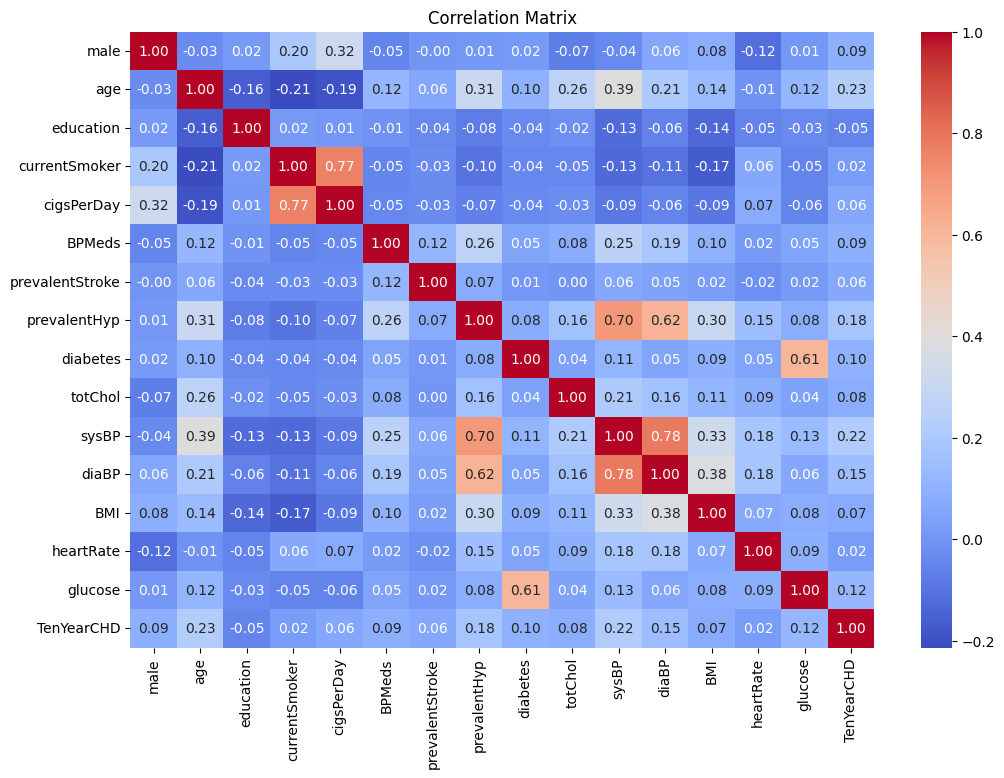

0.7840020914320167

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_imputed.corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Highlight sysBP and diaBP correlation
corr_matrix.loc['sysBP', 'diaBP']


In [52]:
# Drop 'diaBP' to address multicollinearity
X_reduced = X.drop(columns=['diaBP'])

# Recalculate VIF after dropping 'diaBP'
vif_df_reduced = pd.DataFrame()
vif_df_reduced['Feature'] = X_reduced.columns
vif_df_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

vif_df_reduced.sort_values(by='VIF', ascending=False)


,Feature,VIF
10,sysBP,72.760113
11,BMI,40.838325
1,age,40.542642
12,heartRate,37.400315
9,totChol,31.236486
13,glucose,21.044121
3,currentSmoker,4.852362
2,education,4.648813
4,cigsPerDay,4.154992
7,prevalentHyp,2.385603


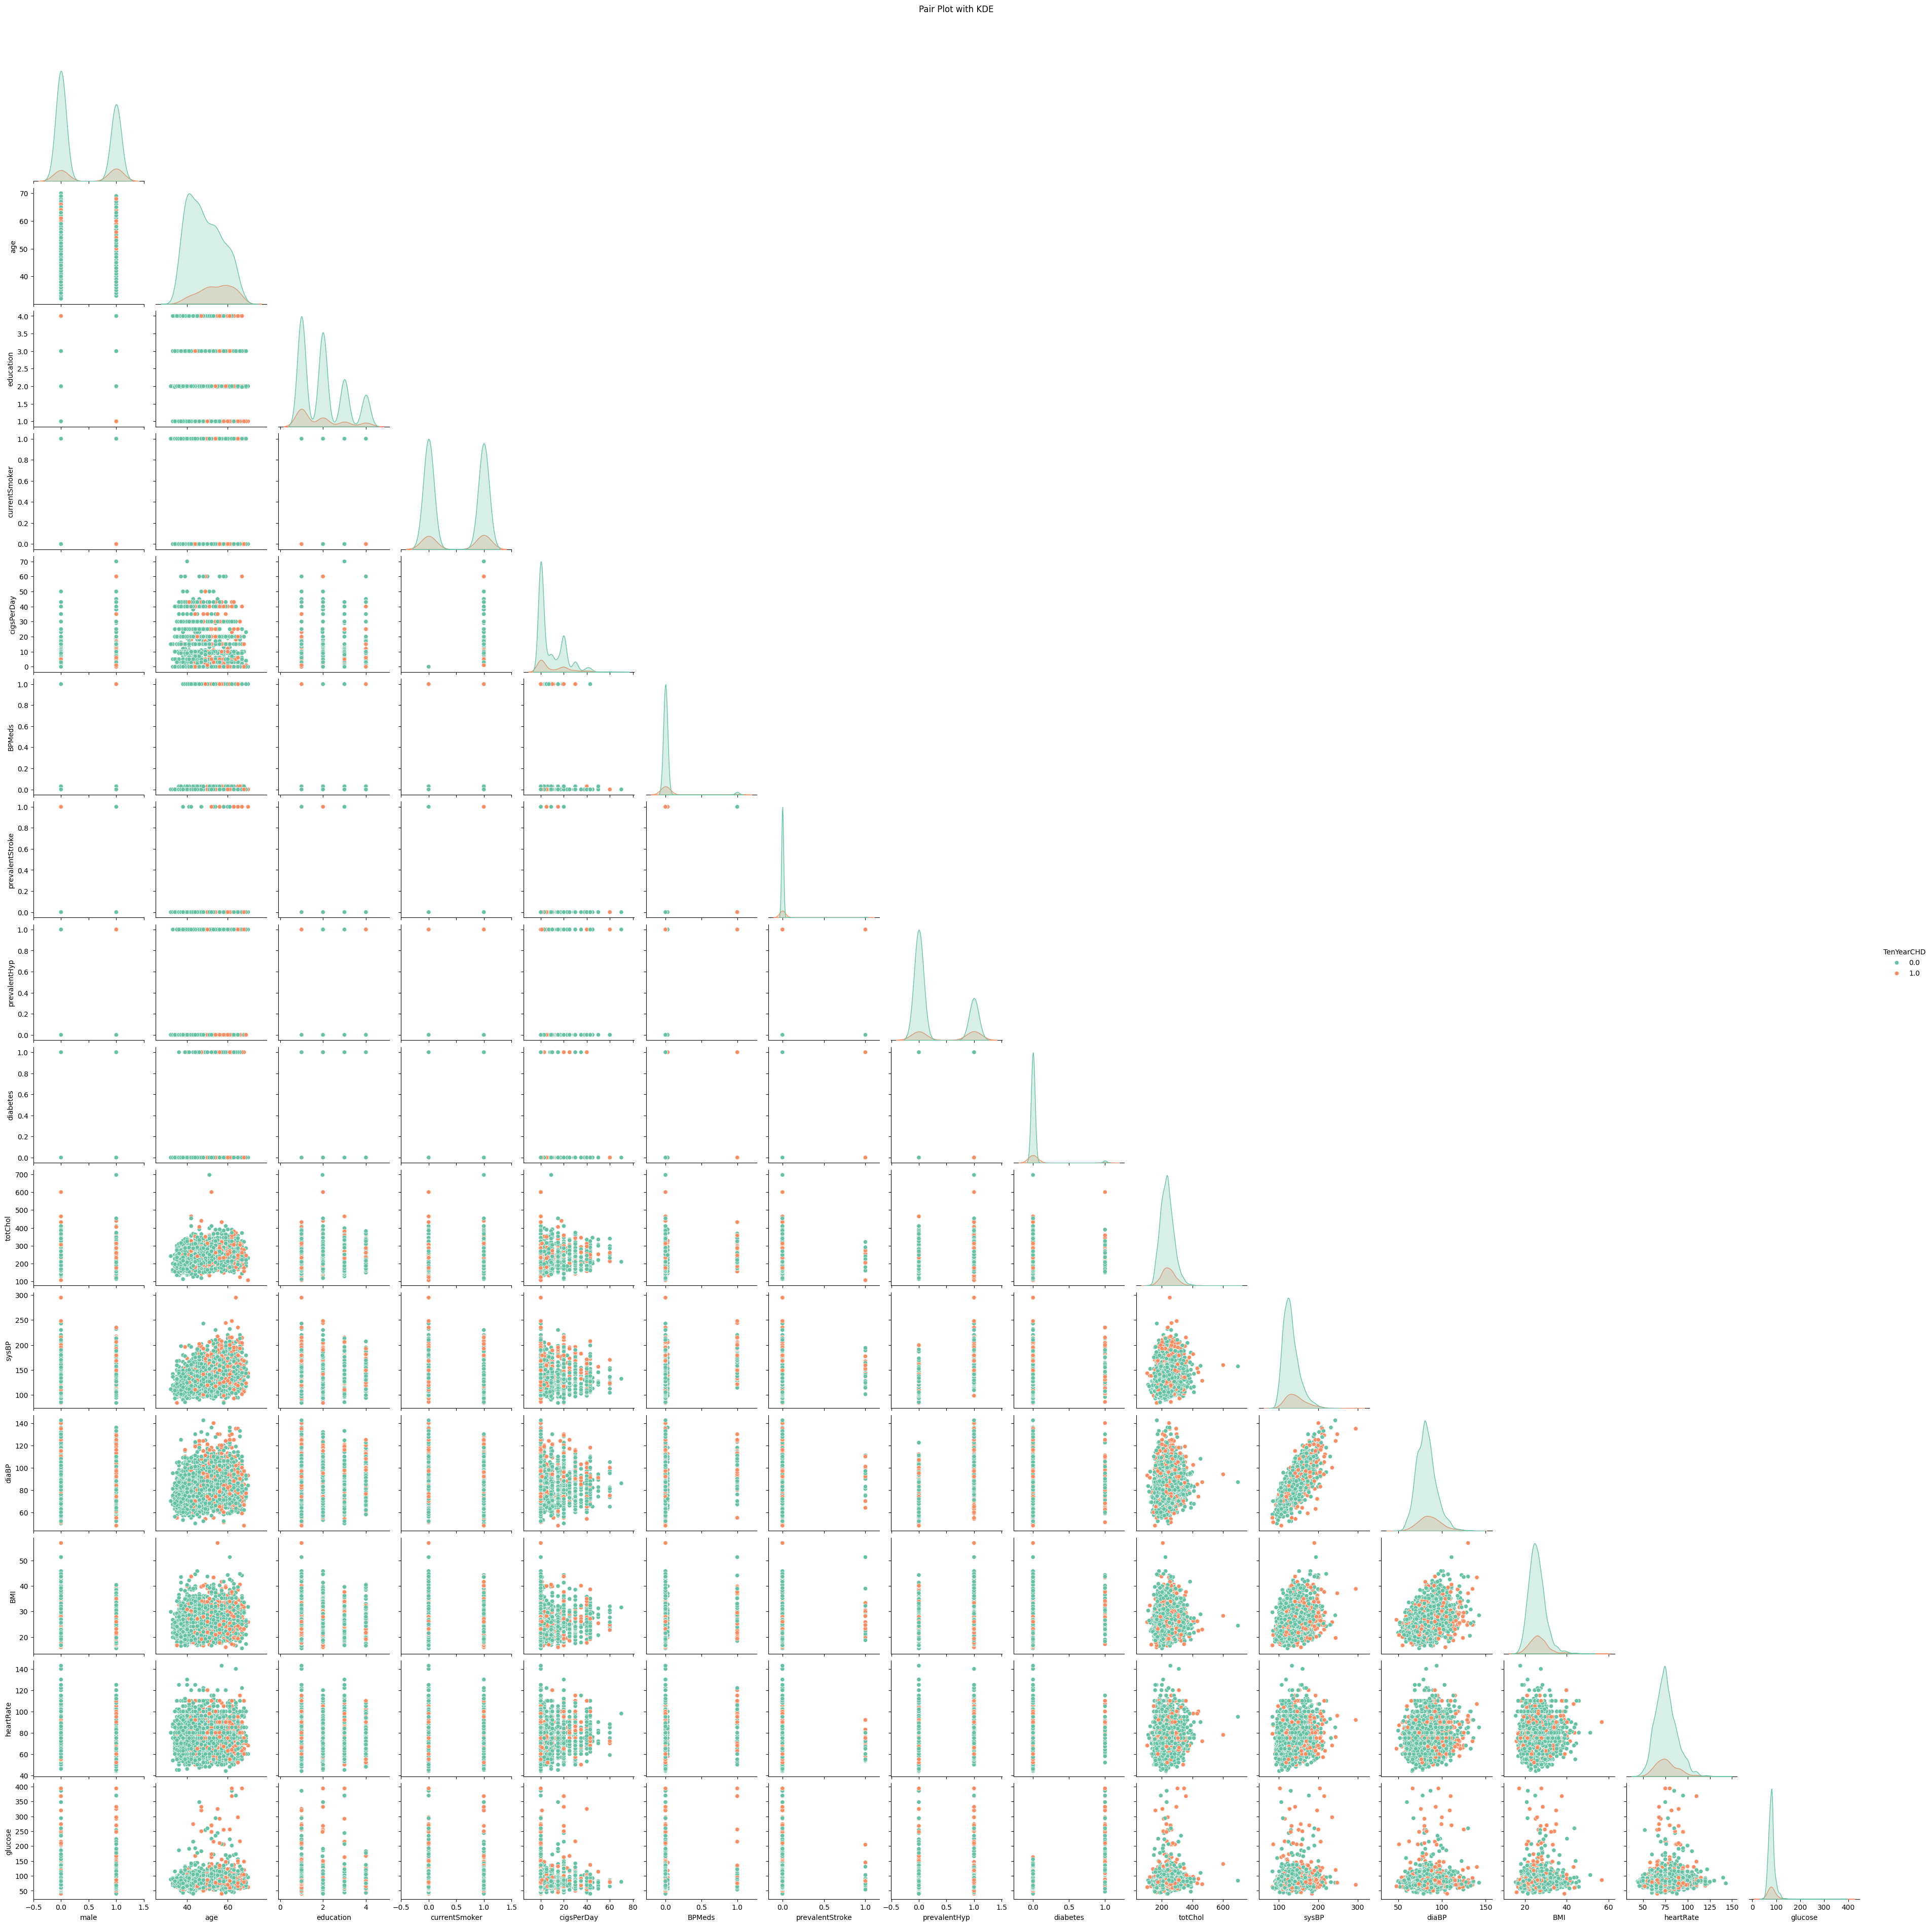

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot with KDE
sns.pairplot(
    data=df_imputed,  # dataframe
    diag_kind='kde',  # Kernel Density Estimation on the diagonal
    hue='TenYearCHD',  # Add color based on target variable if applicable
    palette='Set2',
    corner=True  # Only show the lower triangle
)
plt.suptitle("Pair Plot with KDE", y=1.02)
plt.show()


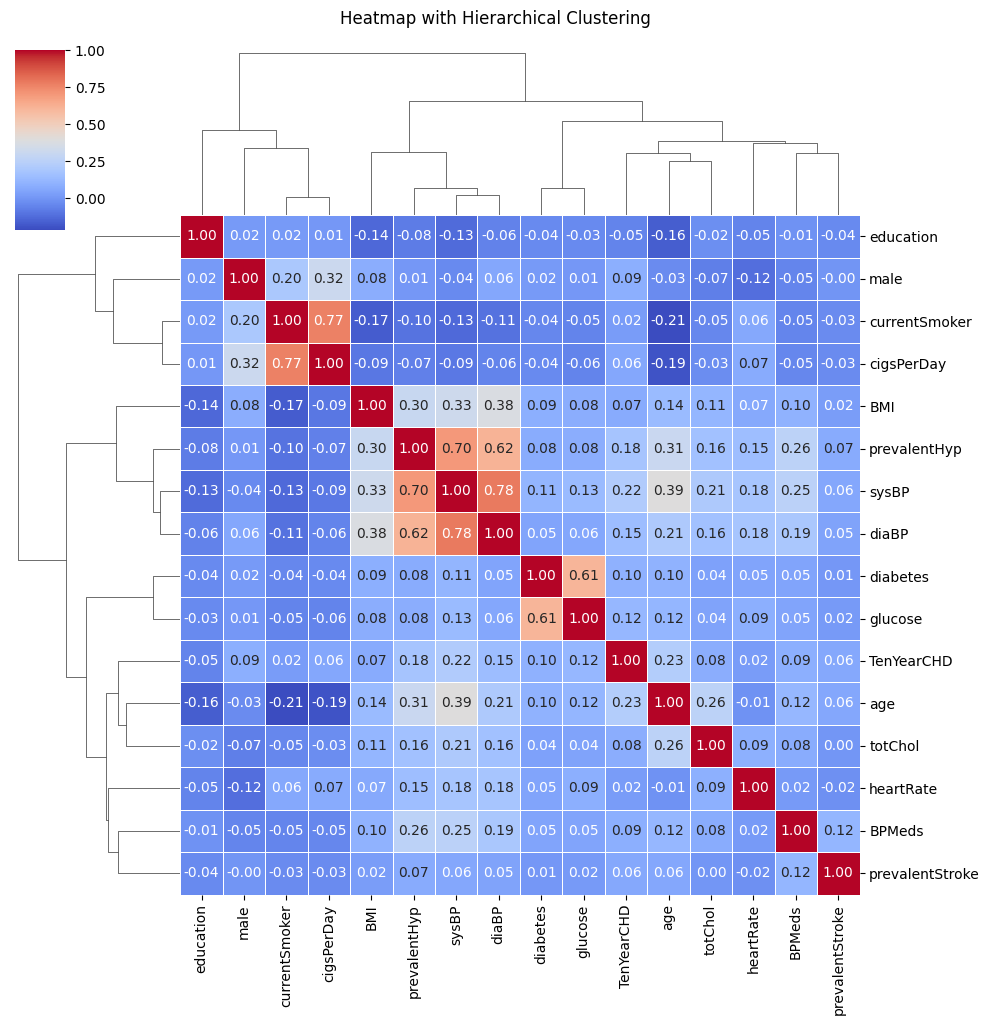

In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Compute the correlation matrix
corr_matrix = df_imputed.corr()

# Perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(corr_matrix, method='ward')

# Plot the clustered heatmap
sns.clustermap(
    corr_matrix,
    annot=True,  # Display correlation values
    fmt='.2f',  # Format values
    cmap='coolwarm',  # Color map
    linewidths=0.5,  # Line width between cells
    row_linkage=linkage_matrix,  # Clustering for rows
    col_linkage=linkage_matrix  # Clustering for columns
)
plt.suptitle("Heatmap with Hierarchical Clustering", y=1.02)
plt.show()


#Task 3

#Implementing Logistic regression from scratch

In [55]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [56]:
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [57]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        predictions = sigmoid(X.dot(theta))
        error = predictions - y
        gradient = (1/m) * (X.T.dot(error))
        theta -= learning_rate * gradient
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

In [58]:
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

In [59]:
y = df_imputed['TenYearCHD'].values
X_new = X.values

In [60]:
X_new = add_bias(X_new)  # Add bias term
theta = np.zeros(X_new.shape[1])  # Initialize parameters

# Hyperparameters
learning_rate = 0.01
num_iterations = 100

theta, cost_history = gradient_descent(X_new, y, theta, learning_rate, num_iterations)

<ipython-input-55-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-56-d738bc7f0048>:4: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-56-d738bc7f0048>:4: RuntimeWarning: invalid value encountered in multiply
  cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


In [61]:
def predict(X, theta):
    return sigmoid(X.dot(theta))

# Example for prediction
predictions = predict(X_new, theta)

<ipython-input-55-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [62]:
from sklearn.metrics import accuracy_score

# Convert probabilities to binary outcomes (assuming threshold of 0.5)
binary_predictions = (predictions >= 0.5).astype(int)
accuracy = accuracy_score(y, binary_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8480415290231241


Another implementation

In [63]:
X_vec = X.values


In [64]:
def forward_propagation(X, w, b):
    # Compute A = sigmoid(w.T * X + b)
    A = sigmoid(np.dot(w.T, X) + b)
    return A


def compute_cost(A, Y, n):
    # Compute cost using the formula you provided
    epsilon = 1e-10
    A = np.clip(A, epsilon, 1 - epsilon)
    cost = -1/n * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

def backward_propagation(X, A, Y, n):
    # Compute gradients dw and db
    dw = np.dot(X, (A - Y).T) / n
    db = np.sum(A - Y) / n
    return dw, db

def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        # Forward propagation
        A = forward_propagation(X, w, b)

        # Compute cost
        cost = compute_cost(A, Y, X.shape[0])
        costs.append(cost)

        # Backward propagation
        dw, db = backward_propagation(X, A, Y, X.shape[0])

        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db

    return w, b, costs

def model(X, Y, num_iterations=100, learning_rate=0.001):
    n_x = X.shape[1]  # number of features
    w = np.zeros((n_x, 1))  # initialize weights
    b = 0  # initialize bias

    # Gradient descent
    w, b, costs = optimize(w, b, X.T, Y, num_iterations, learning_rate)

    return w, b, costs

def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X.T) + b)
    Y_prediction = np.where(A > 0.5, 1, 0)
    return Y_prediction

In [65]:
# Train the model
w, b, costs = model(X_vec, y)

# Make predictions
predictions = predict(w, b, X_vec)

# Print accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8480415290231241


<ipython-input-55-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [66]:
import numpy as np
np.random.seed(0)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X, w, b):
    # Compute A = sigmoid(w.T * X + b)
    A = sigmoid(np.dot(w.T, X) + b)
    return A

def compute_cost(A, y, m):
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    # Compute cost using the formula but for one instance at a time
    cost = -(y * np.log(A) + (1 - y) * np.log(1 - A))
    return cost

def backward_propagation(X, A, y):
    # Compute gradients dw and db for one instance at a time
    dw = (A - y) * X
    db = A - y
    return dw, db

def optimize_SGD(w, b, X, Y, num_epochs, learning_rate):
    m = X.shape[0]  # number of examples
    costs = []

    for epoch in range(num_epochs):
        # Shuffle the data for each epoch to prevent cycles
        perm = np.random.permutation(m)
        X_shuffled = X[perm]
        Y_shuffled = Y[perm]

        for i in range(m):
            # Use one example at a time
            X_i = X_shuffled[i, :].reshape(-1, 1)
            y_i = Y_shuffled[i]

            # Forward propagation
            A = forward_propagation(X_i, w, b)

            # Compute cost for this single instance
            cost = compute_cost(A, y_i, 1)
            costs.append(cost)

            # Backward propagation
            dw, db = backward_propagation(X_i, A, y_i)

            # Update parameters based on this single instance
            w = w - learning_rate * dw.reshape(-1, 1)  # Reshape back to column vector
            b = b - learning_rate * db

    return w, b, costs

def model_SGD(X, Y, num_epochs=100, learning_rate=0.001):
    n_x = X.shape[1]  # number of features
    w = np.zeros((n_x, 1))  # initialize weights
    b = 0  # initialize bias

    # Stochastic Gradient Descent
    w, b, costs = optimize_SGD(w, b, X, Y, num_epochs, learning_rate)

    return w, b, costs

def predict(w, b, X):
    A = sigmoid(np.dot(X, w) + b)
    Y_prediction = (A > 0.5).astype(int)
    return Y_prediction


In [67]:
w, b, costs = model_SGD(X_vec, y)
predictions = predict(w, b, X_vec)
# Print accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8480415290231241


In [68]:
import numpy as np
np.random.seed(42)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X, w, b):
    # Compute A = sigmoid(w.T * X + b)
    A = sigmoid(np.dot(w.T, X) + b)
    return A

def compute_cost(A, Y, m):
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    # Compute cost for the mini-batch
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

def backward_propagation(X, A, Y, m):
    # Compute gradients dw and db for the mini-batch
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    return dw, db

def optimize_mini_batch(w, b, X, Y, num_epochs, learning_rate, batch_size):
    m = X.shape[0]  # number of examples
    costs = []

    for epoch in range(num_epochs):
        # Shuffle the data for each epoch to prevent cycles
        perm = np.random.permutation(m)
        X_shuffled = X[perm]
        Y_shuffled = Y[perm]

        for i in range(0, m, batch_size):
            # Get mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            batch_size_actual = X_batch.shape[0]  # Handle cases where batch size doesn't divide m evenly

            # Forward propagation
            A = forward_propagation(X_batch.T, w, b)

            # Compute cost for the mini-batch
            cost = compute_cost(A, Y_batch, batch_size_actual)
            costs.append(cost)

            # Backward propagation
            dw, db = backward_propagation(X_batch.T, A, Y_batch, batch_size_actual)

            # Update parameters
            w = w - learning_rate * dw
            b = b - learning_rate * db

    return w, b, costs

def model_mini_batch(X, Y, num_epochs=100, learning_rate=0.001, batch_size=32):
    n_x = X.shape[1]  # number of features
    w = np.zeros((n_x, 1))  # initialize weights
    b = 0  # initialize bias

    # Mini-batch Gradient Descent
    w, b, costs = optimize_mini_batch(w, b, X, Y, num_epochs, learning_rate, batch_size)

    return w, b, costs

def predict(w, b, X):
    A = sigmoid(np.dot(X, w) + b)
    Y_prediction = (A > 0.5).astype(int)
    return Y_prediction




In [69]:
w, b, costs = model_mini_batch(X_vec, y)
predictions = predict(w, b, X_vec)
# Print accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8480415290231241


In [70]:
import numpy as np
import time

np.random.seed(42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X, w, b):
    # Compute A = sigmoid(w.T * X + b)
    A = sigmoid(np.dot(w.T, X) + b)
    return A

def compute_cost(A, Y, m):
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    # Compute cost for the mini-batch
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

def backward_propagation(X, A, Y, m):
    # Compute gradients dw and db for the mini-batch
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    return dw, db

def optimize_mini_batch(w, b, X, Y, num_epochs, learning_rate, batch_size):
    m = X.shape[0]  # number of examples
    costs = []

    for epoch in range(num_epochs):
        # Shuffle the data for each epoch to prevent cycles
        perm = np.random.permutation(m)
        X_shuffled = X[perm]
        Y_shuffled = Y[perm]

        for i in range(0, m, batch_size):
            # Get mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            batch_size_actual = X_batch.shape[0]  # Handle cases where batch size doesn't divide m evenly

            # Forward propagation
            A = forward_propagation(X_batch.T, w, b)

            # Compute cost for the mini-batch
            cost = compute_cost(A, Y_batch, batch_size_actual)
            costs.append(cost)

            # Backward propagation
            dw, db = backward_propagation(X_batch.T, A, Y_batch, batch_size_actual)

            # Update parameters
            w = w - learning_rate * dw
            b = b - learning_rate * db

    return w, b, costs

def model_mini_batch(X, Y, num_epochs=100, learning_rate=0.001, batch_size=32):
    n_x = X.shape[1]  # number of features
    w = np.zeros((n_x, 1))  # initialize weights
    b = 0  # initialize bias

    # Start timing
    start_time = time.time()

    costs = []
    epoch_times = []
    for epoch in range(num_epochs):
        epoch_start = time.time()
        w, b, epoch_costs = optimize_mini_batch(w, b, X, Y, 1, learning_rate, batch_size)
        costs.extend(epoch_costs)

        # Check if converged based on cost (example threshold-based convergence)
        if costs[-1] < 0.1:  # Arbitrary convergence threshold
            print(f"Converged at epoch {epoch}")
            break

        epoch_end = time.time()
        epoch_times.append(epoch_end - epoch_start)
        print(f"Epoch {epoch} time: {epoch_end - epoch_start:.2f} seconds")

    # End timing
    end_time = time.time()
    total_time = end_time - start_time

    # Print total training time
    print(f"Total training time: {total_time:.2f} seconds")
    if epoch_times:
        avg_epoch_time = sum(epoch_times) / len(epoch_times)
        print(f"Average time per epoch: {avg_epoch_time:.2f} seconds")

    return w, b, costs, total_time

def predict(w, b, X):
    A = sigmoid(np.dot(X, w) + b)
    Y_prediction = (A > 0.5).astype(int)
    return Y_prediction

# Example usage:
# w, b, costs, training_time = model_mini_batch(X, Y)
# print(f"Training completed in {training_time:.2f} seconds")

In [71]:
w, b, costs, training_time = model_mini_batch(X_vec, y)
predictions = predict(w, b, X_vec)
# Print accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy}")
print(f"Training completed in {training_time:.2f} seconds")

Converged at epoch 0
Total training time: 0.01 seconds
Accuracy: 0.8480415290231241
Training completed in 0.01 seconds


Since the accuracy is similar, it appears the cost function likely has a well-defined minimum and is not overly sensitive to noisy updates.

#Task 4

#4. Optimization Techniques and Advanced comparison

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.from_numpy(X_vec).float()
y_tensor = torch.from_numpy(y).float()

# Create dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Training function
def train(model, optimizer, criterion, epochs):
    for epoch in range(epochs):
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            #Reshape labels to match output shape
            labels = labels.unsqueeze(1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate accuracy
    with torch.no_grad():
        outputs = model(X_tensor)
        predicted = (outputs > 0.5).float()
        accuracy = (predicted == y_tensor.unsqueeze(1)).float().mean()
    return accuracy.item()

# Train with different optimizers
optimizers = {'SGD': optim.SGD, 'Adam': optim.Adam, 'RMSprop': optim.RMSprop}
learning_rate = 0.01  # For SGD, we'll use a higher learning rate; for Adam and RMSprop, it's typically lower

for name, opt_class in optimizers.items():
    model = LogisticRegression(15)
    criterion = nn.BCELoss()

    if name == 'SGD':
        optimizer = opt_class(model.parameters(), lr=learning_rate, momentum=0.9)
    else:
        optimizer = opt_class(model.parameters(), lr=0.001)  # Lower LR for Adam and RMSprop

    accuracy = train(model, optimizer, criterion, epochs=100)
    print(f"{name} - Final Accuracy: {accuracy}")

SGD - Final Accuracy: 0.8480415344238281
Adam - Final Accuracy: 0.8508730530738831
RMSprop - Final Accuracy: 0.8470976948738098


These three algorithms performed similarly as the vanilla stochastic gradient descent.


In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torch.optim.lr_scheduler import StepLR

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.from_numpy(X_vec).float()
y_tensor = torch.from_numpy(y).float()

# Create dataset and dataloader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Training function with early stopping and learning rate scheduler
def train(model, optimizer, criterion, epochs, scheduler=None):
    best_accuracy = 0.0
    patience = 20  # Number of epochs to wait before early stopping
    wait = 0

    for epoch in range(epochs):
        model.train()
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.unsqueeze(1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Learning rate scheduler step if used
        if scheduler:
            scheduler.step()

        # Validation
        model.eval()
        with torch.no_grad():
            outputs = model(X_tensor)
            predicted = (outputs > 0.5).float()
            accuracy = (predicted == y_tensor.unsqueeze(1)).float().mean()
            #print(f"Epoch {epoch+1}/{epochs}, Accuracy: {accuracy.item()}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

    return best_accuracy.item()

# Train with different optimizers with learning rate scheduling and regularization
optimizers = {
    'SGD': (optim.SGD, {'lr': 0.01, 'momentum': 0.9, 'weight_decay': 1e-4}),
    'Adam': (optim.Adam, {'lr': 0.001, 'weight_decay': 1e-4}),
    'RMSprop': (optim.RMSprop, {'lr': 0.001, 'weight_decay': 1e-4, 'momentum': 0.9})
}

for name, (opt_class, params) in optimizers.items():
    model = LogisticRegression(15)
    criterion = nn.BCELoss()

    optimizer = opt_class(model.parameters(), **params)

    # Learning rate scheduler - StepLR reduces lr by gamma every step_size epochs
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

    accuracy = train(model, optimizer, criterion, epochs=100, scheduler=scheduler)
    print(f"{name} - Best Accuracy: {accuracy}")

Early stopping at epoch 21
SGD - Best Accuracy: 0.8480415344238281
Early stopping at epoch 68
Adam - Best Accuracy: 0.8529967069625854
Early stopping at epoch 48
RMSprop - Best Accuracy: 0.8525247573852539


Early stopping at epoch 21


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


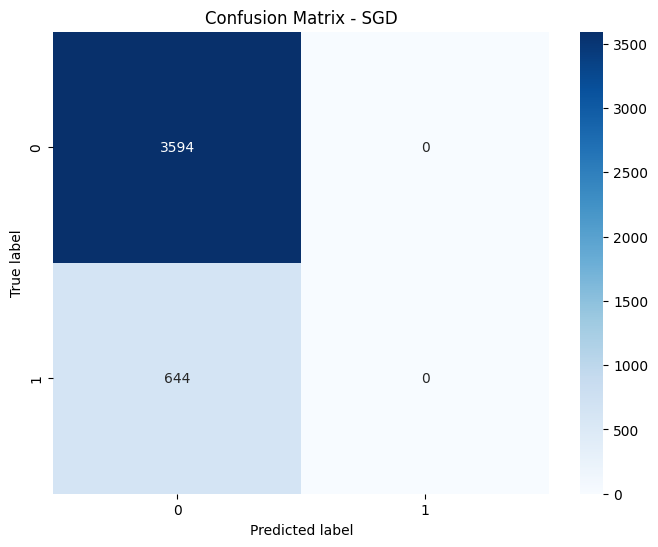

SGD - Final Metrics:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Accuracy: 0.8480
Early stopping at epoch 30


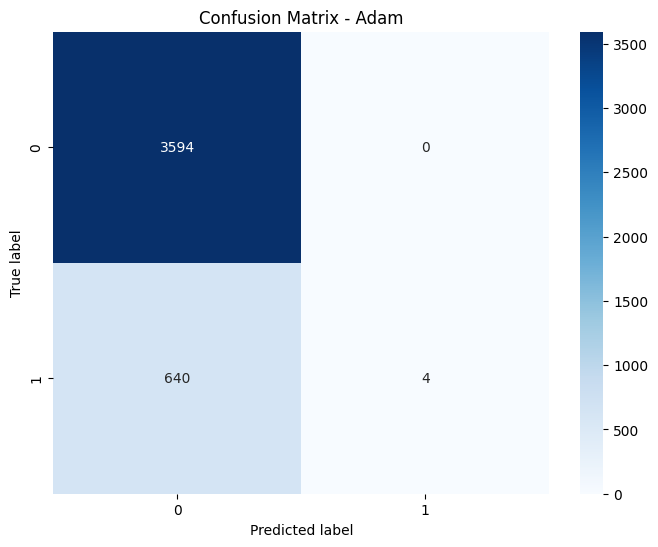

Adam - Final Metrics:
  Precision: 1.0000
  Recall: 0.0062
  F1 Score: 0.0123
  Accuracy: 0.8490
Early stopping at epoch 35


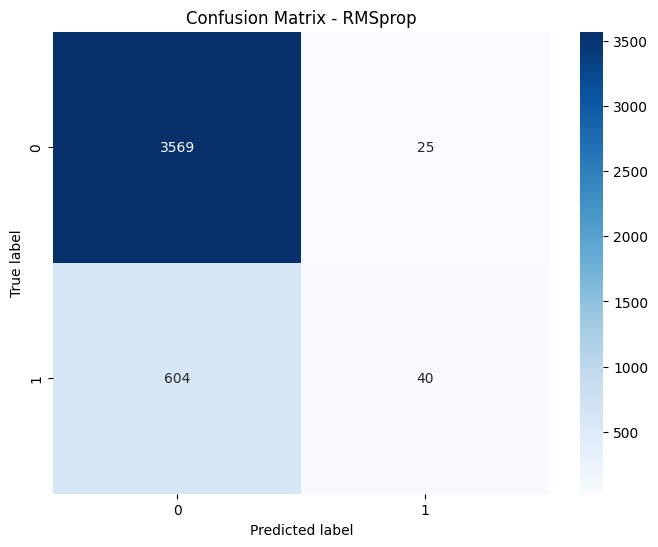

RMSprop - Final Metrics:
  Precision: 0.6154
  Recall: 0.0621
  F1 Score: 0.1128
  Accuracy: 0.8516


In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Define the model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Training function with early stopping and learning rate scheduler
def train(model, optimizer, criterion, epochs, scheduler=None):
    best_accuracy = 0.0
    patience = 20  # Number of epochs to wait before early stopping
    wait = 0

    for epoch in range(epochs):
        model.train()
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.unsqueeze(1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Learning rate scheduler step if used
        if scheduler:
            scheduler.step()

        # Validation
        model.eval()
        with torch.no_grad():
            outputs = model(X_tensor)
            predicted = (outputs > 0.5).float()
            accuracy = (predicted == y_tensor.unsqueeze(1)).float().mean()

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model.state_dict()  # Save the best model
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

    # Load best model state
    model.load_state_dict(best_model)

    # Final evaluation on the best model
    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor)
        predicted = (outputs > 0.5).float().squeeze()
        true_labels = y_tensor.numpy()

        precision = precision_score(true_labels, predicted.numpy())
        recall = recall_score(true_labels, predicted.numpy())
        f1 = f1_score(true_labels, predicted.numpy())
        accuracy = accuracy_score(true_labels, predicted.numpy())
        cm = confusion_matrix(true_labels, predicted.numpy())

        #print(f"Final Evaluation:")
        #print(f"  Precision: {precision:.4f}")
        #print(f"  Recall: {recall:.4f}")
        #print(f"  F1 Score: {f1:.4f}")
        #print(f"  Accuracy: {accuracy:.4f}")

        # Visualize confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

        return precision, recall, f1, accuracy, cm

# Train with different optimizers with learning rate scheduling and regularization
optimizers = {
    'SGD': (optim.SGD, {'lr': 0.01, 'momentum': 0.9, 'weight_decay': 1e-4}),
    'Adam': (optim.Adam, {'lr': 0.001, 'weight_decay': 1e-4}),
    'RMSprop': (optim.RMSprop, {'lr': 0.001, 'weight_decay': 1e-4, 'momentum': 0.9})
}

for name, (opt_class, params) in optimizers.items():
    model = LogisticRegression(15)
    criterion = nn.BCELoss()

    optimizer = opt_class(model.parameters(), **params)

    # Learning rate scheduler - StepLR reduces lr by gamma every step_size epochs
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

    precision, recall, f1, accuracy, cm = train(model, optimizer, criterion, epochs=100, scheduler=scheduler)
    print(f"{name} - Final Metrics:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")

From my observation, Adam consistently gives the same or similar results on multiple runs while other optimizers (like SGD or RMSprop) do not. This is because of the bias corrections in its momentum and variance estimates, which can contribute to numerical stability across runs. For SGD, it predicts class 0 for all inputs which makes all the metrics (precision, recall and F1) to be zero.
For Adam optimization, Precision of 1 means that every instance predicted as positive by the model was actually positive. However, given the context, this might be misleading because if there are very few true positives, precision can be 1 if all predicted positives are correct, but this doesn't necessarily mean the model performs well overall. A recall of 0.062 indicates that the model only captured 6.2% of all actual positive instances. This suggests the model might be very conservative in predicting positive cases, missing out on most of them. The F1 score, which is the harmonic mean of precision and recall, is very low, indicating poor performance. The high precision combined with very low recall results in a low F1 score, showing that the model's ability to balance between precision and recall is severely lacking.

For RSMprop, Precision of about 61.5% means that roughly 61.5% of the instances predicted as positive were actually positive. This suggests a moderate performance in terms of how accurately positive predictions are made. The F1 score for RMSprop is higher than Adam's but still quite low, indicating that while it's better at balancing precision and recall compared to Adam, the model's overall effectiveness is still limited. Similar to Adam, RMSprop's recall is very low, capturing only about 6.2% of all positive instances. This indicates that the model is missing many positive cases.

The imbalance in the data is a huge reason for this where the negative class vastly outnumbers the positive class. Models might then learn to predict the majority class (negative) to achieve higher overall accuracy, leading to poor recall for the minority class (positive).

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torch.optim.lr_scheduler import StepLR

# Define the model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Training function with early stopping and learning rate scheduler
def train(model, optimizer, criterion, epochs, scheduler=None):
    best_accuracy = 0.0
    patience = 20  # Number of epochs to wait before early stopping
    wait = 0

    for epoch in range(epochs):
        model.train()
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.unsqueeze(1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Learning rate scheduler step if used
        if scheduler:
            scheduler.step()

        # Validation
        model.eval()
        with torch.no_grad():
            outputs = model(X_tensor)
            predicted = (outputs > 0.5).float()
            accuracy = (predicted == y_tensor.unsqueeze(1)).float().mean()
            #print(f"Epoch {epoch+1}/{epochs}, Accuracy: {accuracy.item()}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    break

    return best_accuracy.item()

# Hyperparameter grid
learning_rates = [0.1, 0.01, 0.001, 0.0001]
weight_decays = [1e-5, 1e-4, 1e-3]
momentums = [0.9, 0.95, 0.99]  # for SGD

optimizers = {
    'SGD': (optim.SGD, {'lr': None, 'momentum': None, 'weight_decay': None}),
    'Adam': (optim.Adam, {'lr': None, 'weight_decay': None}),
    'RMSprop': (optim.RMSprop, {'lr': None, 'weight_decay': None, 'momentum': 0.9})  # momentum fixed for RMSprop
}

best_params = {}
best_accuracies = {}

for name, (opt_class, params_template) in optimizers.items():
    best_accuracy = 0
    best_param_set = None

    for lr in learning_rates:
        for wd in weight_decays:
            params = params_template.copy()
            params['lr'] = lr
            params['weight_decay'] = wd

            if name == 'SGD':
                for momentum in momentums:
                    params['momentum'] = momentum
                    model = LogisticRegression(15)
                    criterion = nn.BCELoss()
                    optimizer = opt_class(model.parameters(), **params)
                    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
                    accuracy = train(model, optimizer, criterion, epochs=100, scheduler=scheduler)

                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_param_set = params.copy()
            else:
                model = LogisticRegression(15)
                criterion = nn.BCELoss()
                optimizer = opt_class(model.parameters(), **params)
                scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
                accuracy = train(model, optimizer, criterion, epochs=100, scheduler=scheduler)

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_param_set = params.copy()

    best_params[name] = best_param_set
    best_accuracies[name] = best_accuracy
    print(f"{name} - Best Accuracy: {best_accuracy:.4f} with params: {best_param_set}")

# Train with best hyperparameters for each optimizer
for name, params in best_params.items():
    model = LogisticRegression(15)
    criterion = nn.BCELoss()
    optimizer = optimizers[name][0](model.parameters(), **params)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
    accuracy = train(model, optimizer, criterion, epochs=100, scheduler=scheduler)
    print(f"{name} - Validation with best hyperparameters, Final Accuracy: {accuracy:.4f}")

SGD - Best Accuracy: 0.8513 with params: {'lr': 0.0001, 'momentum': 0.9, 'weight_decay': 0.001}
Adam - Best Accuracy: 0.8525 with params: {'lr': 0.01, 'weight_decay': 0.0001}
RMSprop - Best Accuracy: 0.8532 with params: {'lr': 0.0001, 'weight_decay': 1e-05, 'momentum': 0.9}
SGD - Validation with best hyperparameters, Final Accuracy: 0.1520
Adam - Validation with best hyperparameters, Final Accuracy: 0.8523
RMSprop - Validation with best hyperparameters, Final Accuracy: 0.8532


With hyperparameter tuning, the accuracies are much more closer. It gives the optimal performance for each algorithm based on the accuracy. It could be different if the perfomance metrics is different from accuracy.

Training stopped. Best accuracy achieved: 0.8490


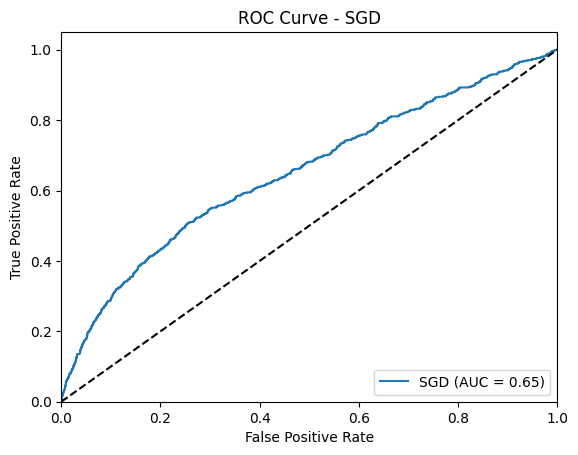

SGD - AUC: 0.6508
Training stopped. Best accuracy achieved: 0.8511


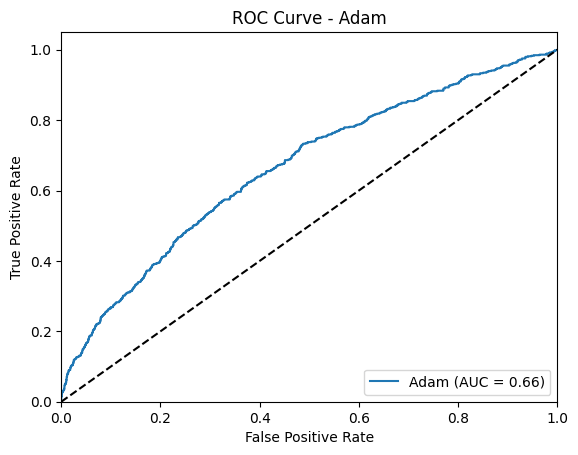

Adam - AUC: 0.6629
Training stopped. Best accuracy achieved: 0.8516


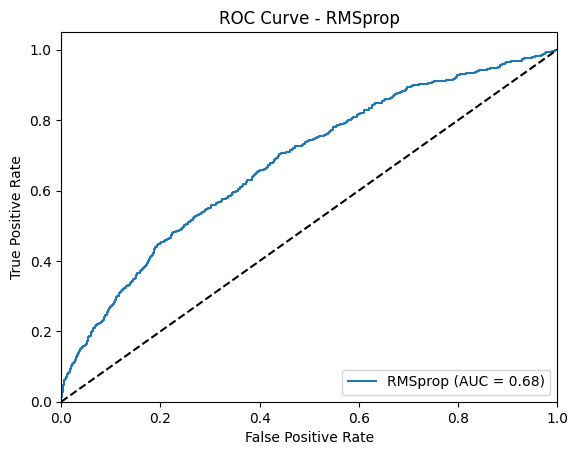

RMSprop - AUC: 0.6786


In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Training function without printing for ROC curve analysis
def train_for_roc(model, optimizer, criterion, epochs, scheduler=None):
    patience = 20  # Number of epochs to wait before early stopping
    wait = 0
    best_accuracy = 0

    for epoch in range(epochs):
        model.train()
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.unsqueeze(1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        if scheduler:
            scheduler.step()

        # Validation
        model.eval()
        with torch.no_grad():
            outputs = model(X_tensor)
            predicted = (outputs > 0.5).float()
            accuracy = (predicted == y_tensor.unsqueeze(1)).float().mean()

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    break
    print(f"Training stopped. Best accuracy achieved: {best_accuracy:.4f}")
    return model  # Return the trained model

# Best parameters for each optimizer based on your provided data
best_params = {
    'SGD': {'lr': 0.0001, 'momentum': 0.9, 'weight_decay': 0.001},
    'Adam': {'lr': 0.01, 'weight_decay': 0.0001},
    'RMSprop': {'lr': 0.0001, 'weight_decay': 1e-05, 'momentum': 0.9}
}

# ROC curve analysis for each optimizer with updated best parameters
for name, params in best_params.items():
    # Initialize model and optimizer with best parameters
    model = LogisticRegression(15)
    criterion = nn.BCELoss()
    if name == 'SGD':
        optimizer = optim.SGD(model.parameters(), **params)
    elif name == 'Adam':
        optimizer = optim.Adam(model.parameters(), **params)
    else:  # RMSprop
        optimizer = optim.RMSprop(model.parameters(), **params)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

    # Train model
    trained_model = train_for_roc(model, optimizer, criterion, epochs=100, scheduler=scheduler)

    # ROC curve analysis
    trained_model.eval()
    with torch.no_grad():
        outputs = trained_model(X_tensor)
        predicted_probs = outputs.squeeze().numpy()
        true_labels = y_tensor.numpy()

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

        print(f"{name} - AUC: {roc_auc:.4f}")

RMSprop shows the highest AUC among the three, suggesting it's the best at distinguishing between the classes out of these options. An AUC of 0.68 means there's a 68% chance the model will rank a randomly chosen positive instance higher than a negative one. The confusion matrix for RSMprop shows this. All three optimizers result in models with similar, moderate performance in terms of AUC. This suggests that while the choice of optimizer does affect performance, the differences here are not dramatic.
Also, the imbalance in the data could explain the moderate AUC scores, as it's often harder to achieve high AUC with imbalanced data without specific strategies to handle the imbalance.


When deciding between SGD, Adam, and RMSprop for machine learning tasks, it's crucial to consider their trade-offs. SGD is straightforward and memory-efficient, ideal for large datasets where you can tolerate some noise in learning, but it might take longer to converge without careful tuning. Adam offers faster convergence with its adaptive learning rate, making it excellent for large, complex datasets, though it requires more memory to keep track of gradient statistics. RMSprop strikes a balance, providing adaptive learning without as much memory overhead as Adam, suitable when you need adaptability but are constrained by resources. Whichever one is chosen should hinge on whether one prioritizes speed, memory efficiency, or the interpretability of how the model learns from the data, along with the specific characteristics of the dataset and problem at hand.